<a href="https://colab.research.google.com/github/gEarthquake/Gruop-eartquake/blob/main/earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd   # bo away ready file kaman bkain 
import numpy as np   #bo hazhmara birkaryakan w random ya array 
import scipy.stats as st   # bo probability destribution 
import matplotlib.pyplot as plt  #  bo keshani wenakan  w histogram 
import seaborn as sns  # bo color 
sns.set(color_codes=True) #bo henani hamu color kan

In [7]:
mydata = pd.read_csv('/content/statistics.csv')

# New Section

In [8]:
mydata.head(5)

,time,latitude,longitude,depth,mag,magtype,net,id,updated,place,type,status,locationSource,magsource
0,2022-01-10T18:29:47.778Z,35.5088,44.8992,10.0,4.5,mb,us,us7000gamy,2022-01-13T10:23:18.225Z,"6 km ESE of Jamjam?l, Iraq",earthquake,reviewed,us,us
1,2021-11-28T16:11:20.633Z,34.3978,45.7435,10.0,4.3,mb,us,us7000fxrx,2021-12-05T18:17:34.040Z,"13 km WSW of Sarpol-e Z?ah?b, Iran",earthquake,reviewed,us,us
2,2021-09-28T11:46:12.021Z,34.5294,45.3747,10.0,4.3,mb,us,us6000fqtc,2021-12-04T14:28:51.040Z,"41 km ESE of Kifr?, Iraq",earthquake,reviewed,us,us
3,2021-09-28T08:58:23.893Z,34.4735,45.5293,10.0,4.3,mb,us,us6000fqtd,2021-12-04T14:28:51.040Z,"30 km W of Sarpol-e Z?ah?b, Iran",earthquake,reviewed,us,us
4,2021-09-24T23:43:12.390Z,36.7164,42.4005,10.0,4.4,mb,us,us7000fe95,2021-12-04T14:29:26.040Z,"51 km S of Ã‡iftlikkÃ¶yÃ¼, Turkey",earthquake,reviewed,us,us


In [9]:
mydata.describe(include="all")

,time,latitude,longitude,depth,mag,magtype,net,id,updated,place,type,status,locationSource,magsource
count,649,649.000000,649.000000,649.000000,649.000000,649,649,649,649,649,649,649,649,649
unique,649,NaN,NaN,NaN,NaN,7,1,649,463,546,1,1,5,5
top,2022-01-10T18:29:47.778Z,NaN,NaN,NaN,NaN,mb,us,us7000gamy,2014-11-15T04:07:14.000Z,Iran-Iraq border region,earthquake,reviewed,us,us
freq,1,NaN,NaN,NaN,NaN,581,649,1,19,13,649,649,454,611
mean,NaN,33.656041,46.535461,11.443713,4.405547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.299416,1.305751,5.279702,0.424955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,29.041300,39.085300,0.900000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,32.658900,45.690000,10.000000,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,33.599100,46.443100,10.000000,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,34.486300,47.630000,10.000000,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            649 non-null    object 
 1   latitude        649 non-null    float64
 2   longitude       649 non-null    float64
 3   depth           649 non-null    float64
 4   mag             649 non-null    float64
 5   magtype         649 non-null    object 
 6   net             649 non-null    object 
 7   id              649 non-null    object 
 8   updated         649 non-null    object 
 9   place           649 non-null    object 
 10  type            649 non-null    object 
 11  status          649 non-null    object 
 12  locationSource  649 non-null    object 
 13  magsource       649 non-null    object 
dtypes: float64(4), object(10)
memory usage: 71.1+ KB


In [11]:
mydata.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magtype', 'net', 'id',
       'updated', 'place', 'type', 'status', 'locationSource', 'magsource'],
      dtype='object')

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'mag'}>]], dtype=object)

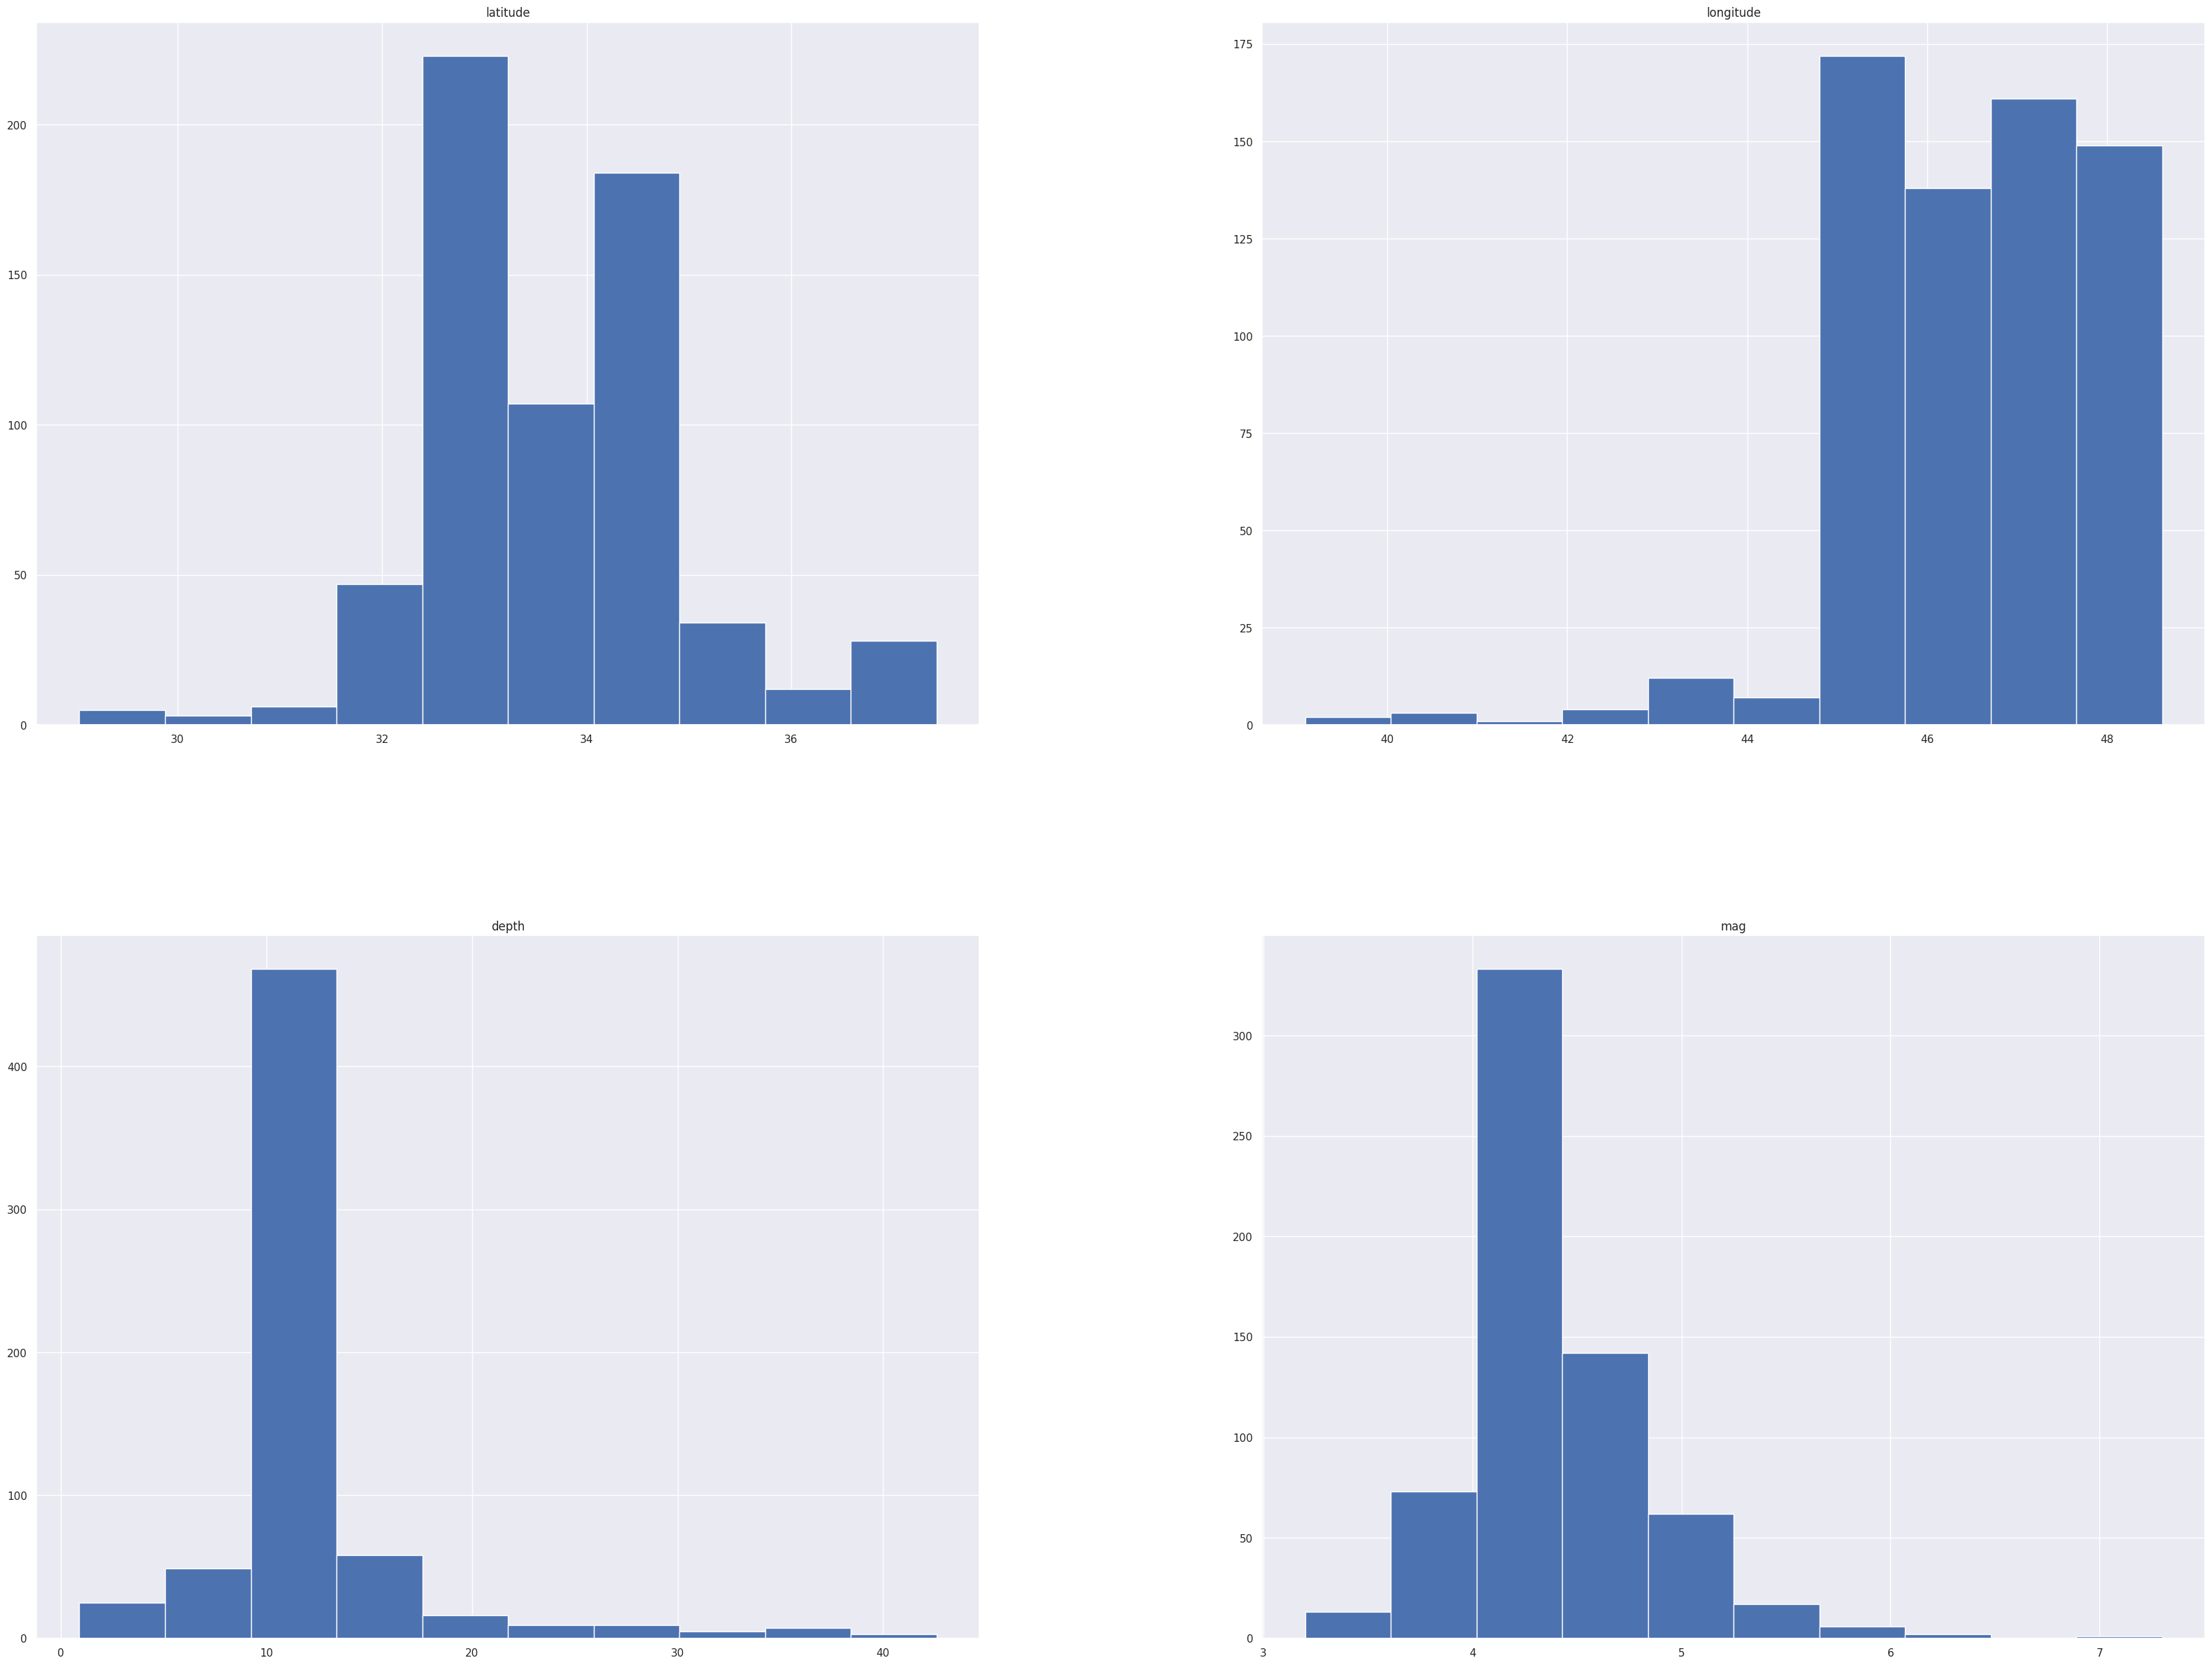

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(40,30))

<Axes: xlabel='longitude', ylabel='latitude'>

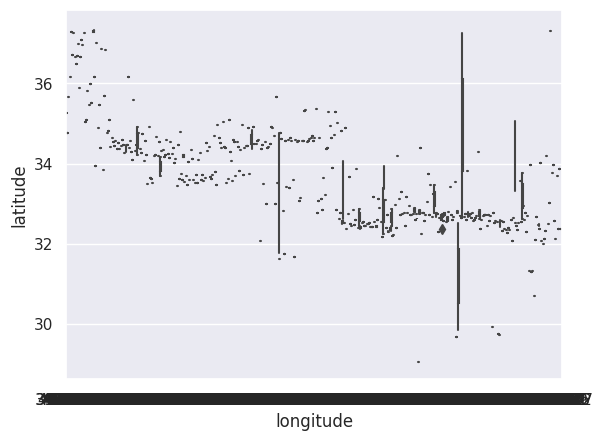

In [15]:
   #aw xalla rashana outlier, xatakau nawrast box kan median'a ,box ka hamui IQR ka Q1 xaty yakamy box lower quartile, Q2 median w Q3 xaty 3 upper quartile
#am sar w awsary boxala maxmum w minimum , b o away bilain bo vertical x w y ka agorin 
 
sns.boxplot(y="latitude", x="longitude", data=mydata)

In [16]:
pd.crosstab(mydata['longitude'],mydata['magtype'] ) #bo barawrdi du column

magtype,mb,mblg,ml,mwb,mwc,mwr,mww
longitude,,,,,,,
39.0853,1,0,0,0,0,0,0
39.6992,1,0,0,0,0,0,0
40.5391,1,0,0,0,0,0,0
40.5940,1,0,0,0,0,0,0
40.9560,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
48.5756,1,0,0,0,0,0,0
48.5900,1,0,0,0,0,0,0
48.6020,1,0,0,0,0,0,0


In [18]:
pd.crosstab(mydata['longitude'],mydata['magtype'] )

magtype,mb,mblg,ml,mwb,mwc,mwr,mww
longitude,,,,,,,
39.0853,1,0,0,0,0,0,0
39.6992,1,0,0,0,0,0,0
40.5391,1,0,0,0,0,0,0
40.5940,1,0,0,0,0,0,0
40.9560,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
48.5756,1,0,0,0,0,0,0
48.5900,1,0,0,0,0,0,0
48.6020,1,0,0,0,0,0,0


<Axes: xlabel='depth', ylabel='count'>

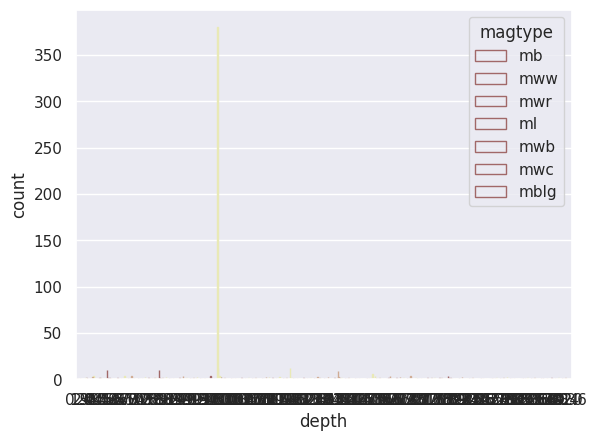

In [19]:
sns.countplot(x="depth", hue="magtype", data=mydata, edgecolor=sns.color_palette("pink",3) ,  facecolor=(0, 0, 0, 0))
#barawrdaka daka ba wenayy 

In [20]:
pd.pivot_table(mydata, index=['depth', 'magtype'],
                     columns=[ 'locationSource'], aggfunc=len)

id                       latitude                        ...  \
locationSource isk  teh  thr   us us_thr      isk  teh  thr   us us_thr  ...   
depth magtype                                                            ...   
0.9   mb       NaN  1.0  NaN  NaN    NaN      NaN  1.0  NaN  NaN    NaN  ...   
1.0   mb       NaN  1.0  NaN  NaN    NaN      NaN  1.0  NaN  NaN    NaN  ...   
2.2   mblg     NaN  1.0  NaN  NaN    NaN      NaN  1.0  NaN  NaN    NaN  ...   
2.8   mb       NaN  1.0  NaN  NaN    NaN      NaN  1.0  NaN  NaN    NaN  ...   
3.0   mb       NaN  1.0  NaN  NaN    NaN      NaN  1.0  NaN  NaN    NaN  ...   
...             ..  ...  ...  ...    ...      ...  ...  ...  ...    ...  ...   
38.2  mb       NaN  NaN  1.0  NaN    NaN      NaN  NaN  1.0  NaN    NaN  ...   
38.3  mb       NaN  NaN  NaN  1.0    NaN      NaN  NaN  NaN  1.0    NaN  ...   
39.4  mb       NaN  NaN  1.0  NaN    NaN      NaN  NaN  1.0  NaN    NaN  ...   
40.0  mb       NaN  NaN  1.0  NaN    NaN      NaN  NaN  1.0  NaN    NaN  ...   
42.6  mb       NaN  NaN  NaN  1.0    NaN      NaN  NaN  NaN  1.0    NaN  ...   

               type                       updated                        
locationSource  isk  teh  thr   us us_thr     isk  teh  thr   us us_thr  
depth magtype                                                            
0.9   mb        NaN  1.0  NaN  NaN    NaN     NaN  1.0  NaN  NaN    NaN  
1.0   mb        NaN  1.0  NaN  NaN    NaN     NaN  1.0  NaN  NaN    NaN  
2.2   mblg      NaN  1.0  NaN  NaN    NaN     NaN  1.0  NaN  NaN    NaN  
2.8   mb        NaN  1.0  NaN  NaN    NaN     NaN  1.0  NaN  NaN    NaN  
3.0   mb        NaN  1.0  NaN  NaN    NaN     NaN  1.0  NaN  NaN    NaN  
...             ...  ...  ...  ...    ...     ...  ...  ...  ...    ...  
38.2  mb        NaN  NaN  1.0  NaN    NaN     NaN  NaN  1.0  NaN    NaN  
38.3  mb        NaN  NaN  NaN  1.0    NaN     NaN  NaN  NaN  1.0    NaN  
39.4  mb        NaN  NaN  1.0  NaN    NaN     NaN  NaN  1.0  NaN    NaN  
40.0  mb        NaN  NaN  1.0  NaN    NaN     NaN  NaN  1.0  NaN    NaN  
42.6  mb        NaN  NaN  NaN  1.0    NaN     NaN  NaN  NaN  1.0    NaN  

[174 rows x 55 columns]

In [21]:
pd.pivot_table(mydata,'mag', index=['magsource', 'magtype'],
                     columns=[ 'locationSource'])

locationSource      isk       teh       thr        us  us_thr
magsource magtype                                            
bhd       ml        NaN       NaN       NaN  4.000000     NaN
gcmt      mwc       NaN  5.100000  4.900000  5.300000     NaN
teh       mblg      NaN  3.656250  3.833333  3.900000     NaN
thr       ml        NaN  4.200000  3.600000  3.500000     NaN
us        mb       4.62  4.344928  4.355000  4.385372     4.1
          ml        NaN       NaN       NaN  3.700000     NaN
          mwb       NaN  5.433333       NaN  5.325000     NaN
          mwr       NaN       NaN       NaN  5.300000     NaN
          mww       NaN  6.200000       NaN  5.560000     NaN

In [23]:
pd.pivot_table(mydata,'depth', index=['magsource', 'magtype'],
                     columns=[ 'locationSource'])

locationSource      isk        teh        thr         us  us_thr
magsource magtype                                               
bhd       ml        NaN        NaN        NaN  10.000000     NaN
gcmt      mwc       NaN  10.333333  23.300000  20.200000     NaN
teh       mblg      NaN  12.137500  18.700000  10.000000     NaN
thr       ml        NaN   9.400000  14.933333  17.233333     NaN
us        mb       9.72  11.292029  20.205000  10.825468    16.3
          ml        NaN        NaN        NaN  10.000000     NaN
          mwb       NaN  16.433333        NaN  11.775000     NaN
          mwr       NaN        NaN        NaN  10.000000     NaN
          mww       NaN  10.200000        NaN  11.377500     NaN

In [24]:
mydata['latitude'].std() #standard deviation 

1.2994163768429847

In [25]:
mydata['mag'].mean()

4.405546995377503

array([[<Axes: title={'center': 'mb'}>, <Axes: title={'center': 'mblg'}>,
        <Axes: title={'center': 'ml'}>],
       [<Axes: title={'center': 'mwb'}>, <Axes: title={'center': 'mwc'}>,
        <Axes: title={'center': 'mwr'}>],
       [<Axes: title={'center': 'mww'}>, <Axes: >, <Axes: >]],
      dtype=object)

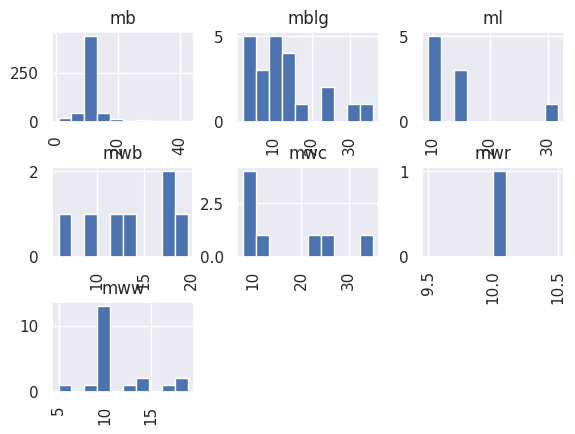

In [26]:
mydata.hist(by='magtype',column = 'depth') #keshani histogram

In [28]:
x = st.skewnorm.rvs(10, size=10000) # x variable w 10000 la har saple la 10ka 

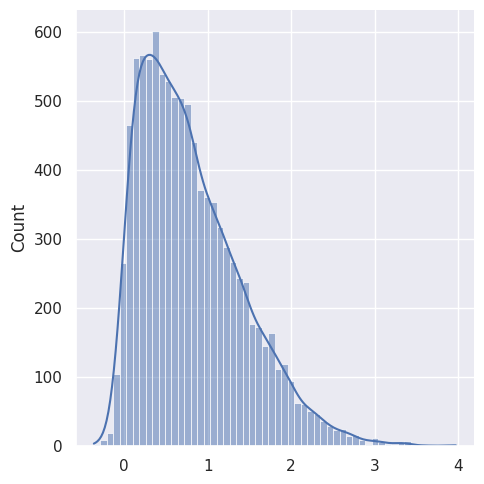

In [29]:
_ = sns.displot(x,kde= True)  # right skew 

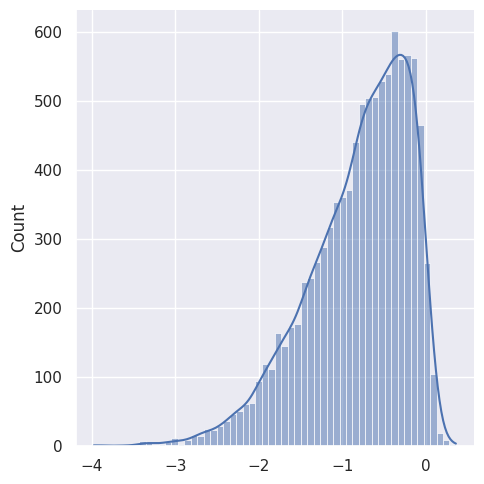

In [30]:
 _= sns.displot(-x,kde= True)  # left skew  , wa agar bmanawe normalman bo darche size 10000 kam dakainawa 

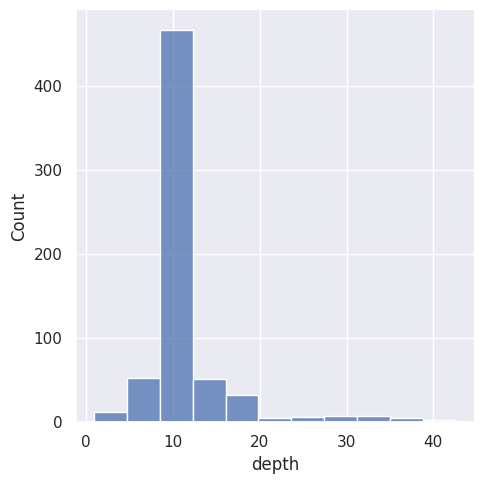

In [31]:
sns.displot(mydata['depth'])

array([[<Axes: title={'center': 'mb'}>, <Axes: title={'center': 'mblg'}>,
        <Axes: title={'center': 'ml'}>],
       [<Axes: title={'center': 'mwb'}>, <Axes: title={'center': 'mwc'}>,
        <Axes: title={'center': 'mwr'}>],
       [<Axes: title={'center': 'mww'}>, <Axes: >, <Axes: >]],
      dtype=object)

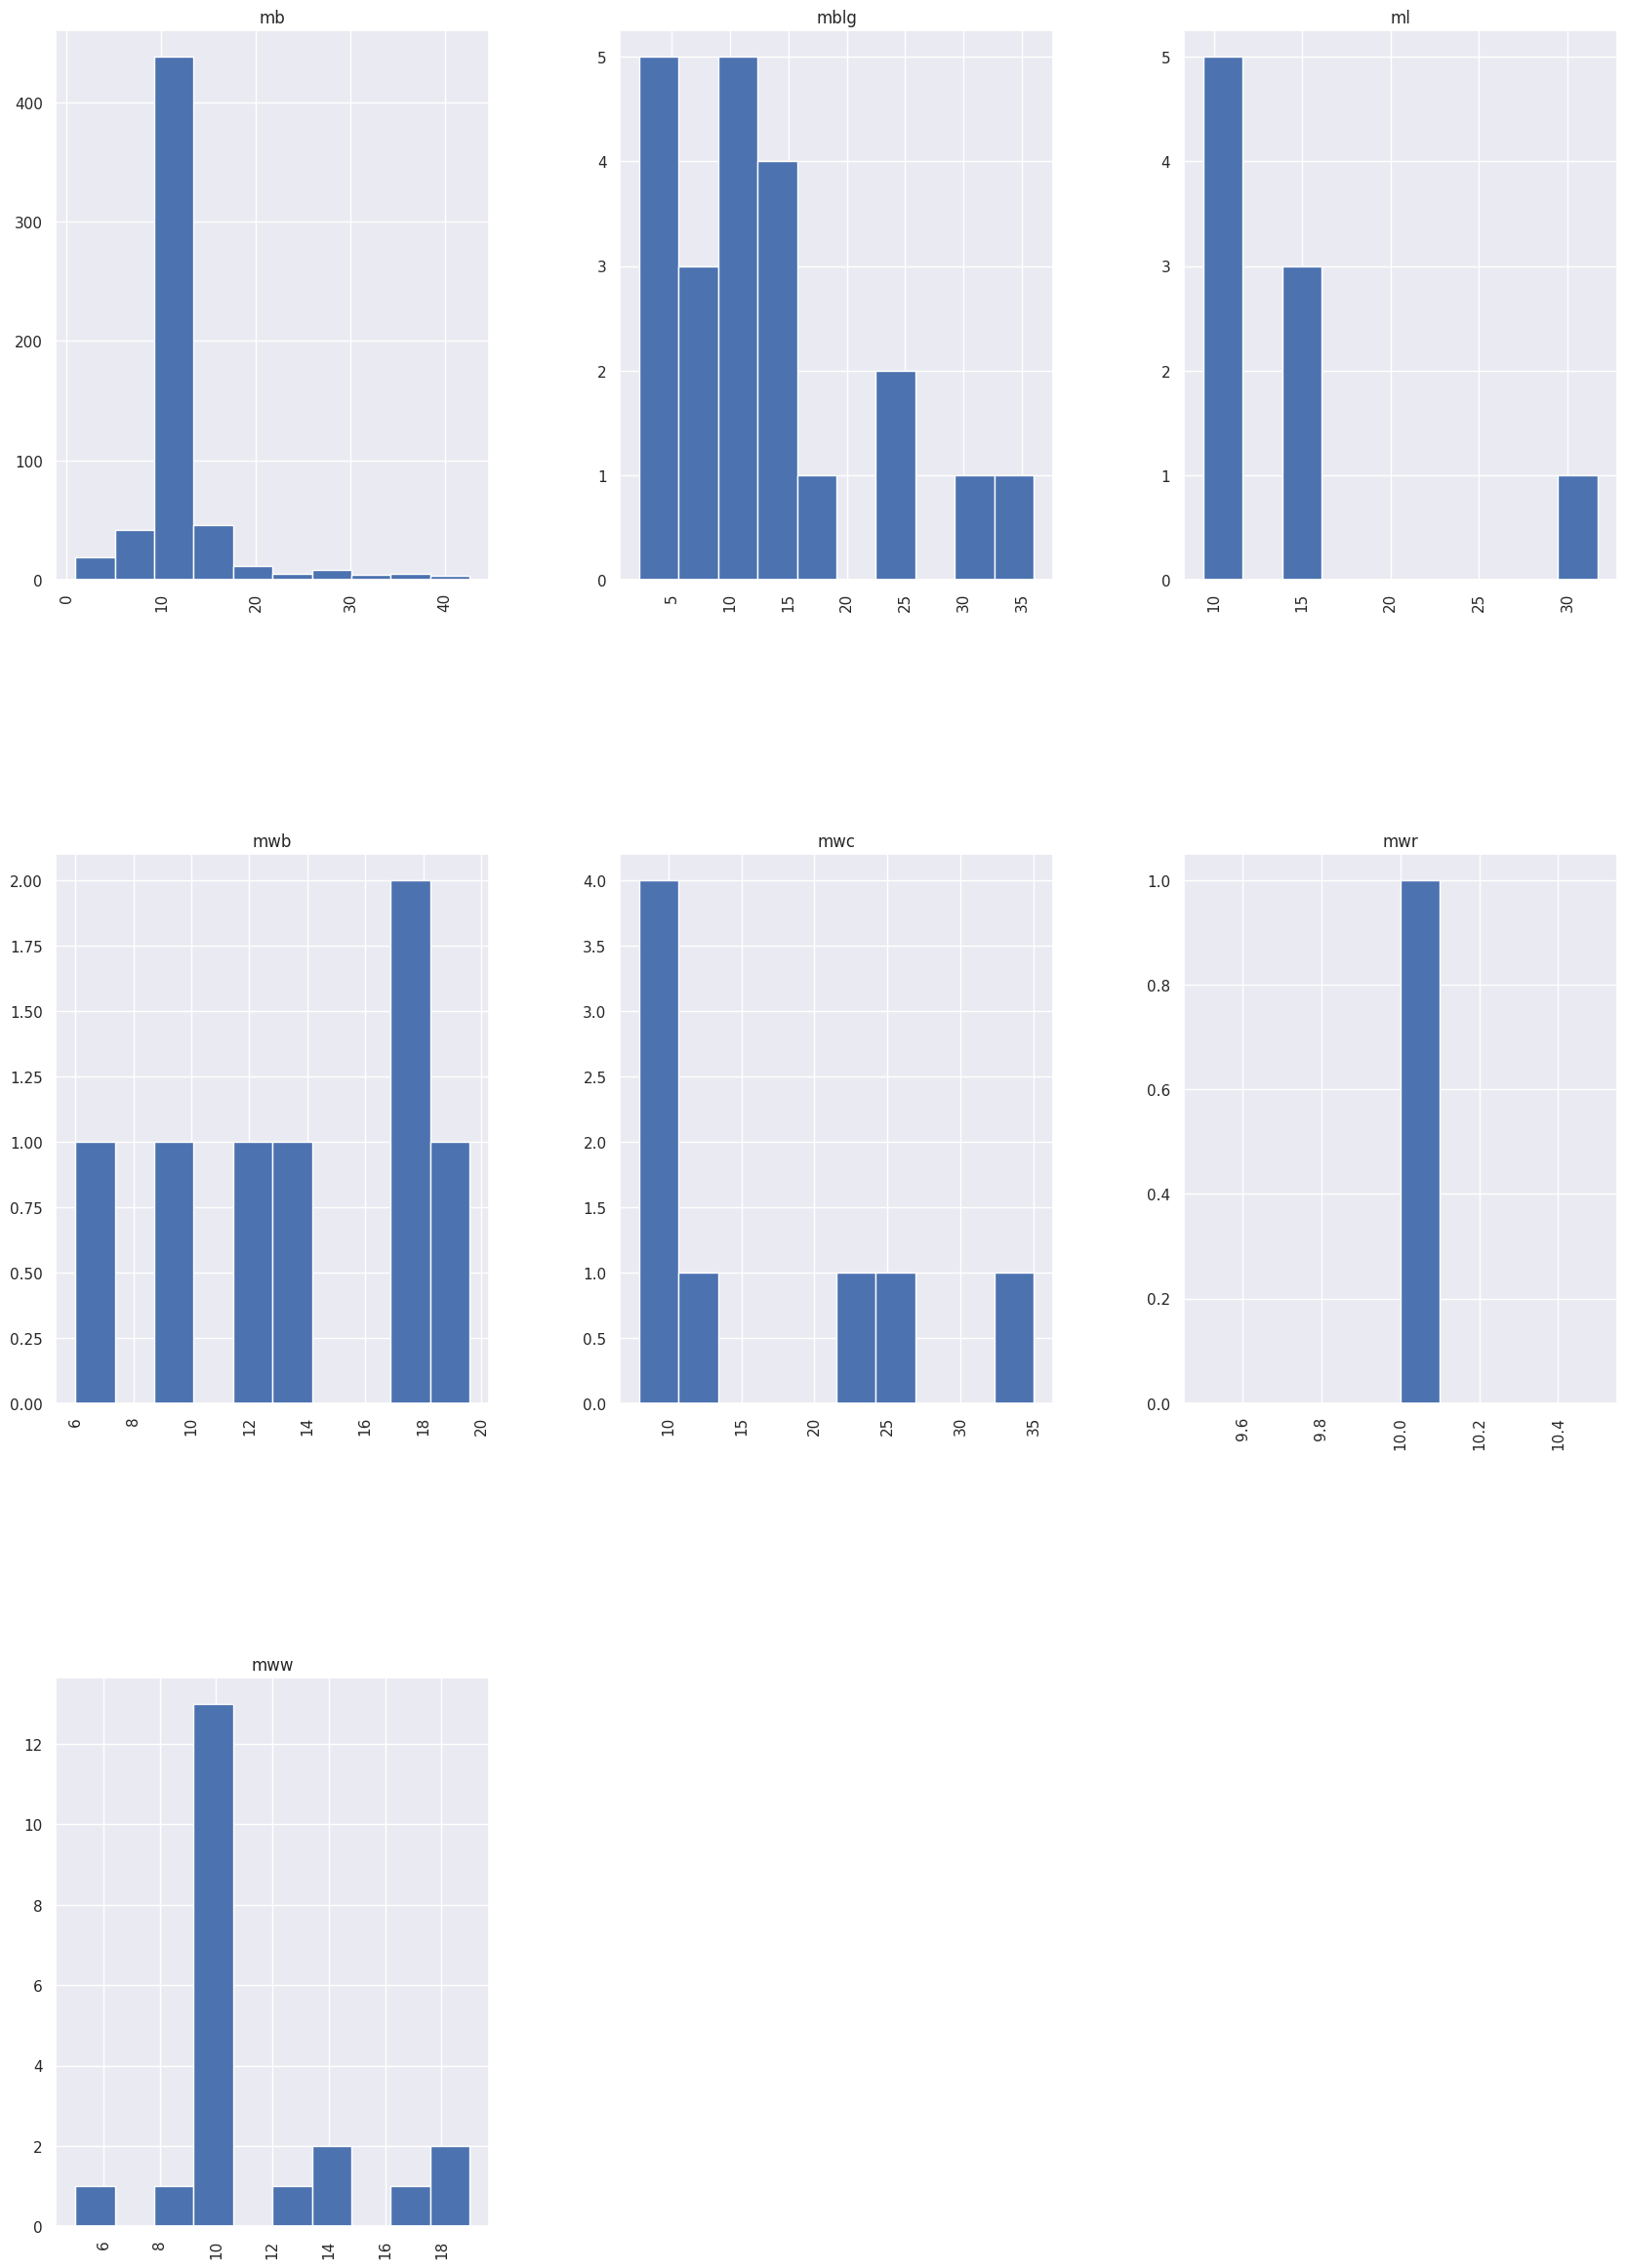

In [32]:
mydata.hist(by='magtype',column = 'depth', figsize=(20,30))

In [34]:
x[1:150]

array([ 0.98432728, -0.04863555,  2.25971536,  0.5442794 ,  0.41437639,
        1.40747724,  0.3632092 ,  0.54341772,  0.96887457,  0.32539048,
        1.90099472,  0.45593981,  0.75037403, -0.03824844,  0.71221979,
        1.49664059,  0.54517835,  0.44716097,  0.30831663,  1.10297372,
        0.48309422,  0.82539612,  0.00741323,  0.48427795,  1.77832725,
        0.62803314,  1.63232469,  0.41087725,  0.42110578,  1.6071328 ,
        0.86166608,  1.64225984,  1.25295406,  0.77029377,  0.97452375,
        0.35603524,  0.66860218,  0.52395265,  0.80955254,  1.5879757 ,
        0.81417054,  0.50456038,  0.42340696,  1.14978941,  0.10090135,
        0.25791387,  0.65109602,  1.4215789 ,  2.16639753,  0.42475884,
        1.56333389,  1.20285101,  0.4704922 ,  1.74622709,  1.40929901,
        0.69795118,  1.39171123,  0.78505362,  0.92314424,  0.28690496,
        0.60389292,  0.47103992,  1.49087044,  2.04522297,  0.01269893,
       -0.04313793,  0.44047027,  1.39305087,  2.28245816,  1.31

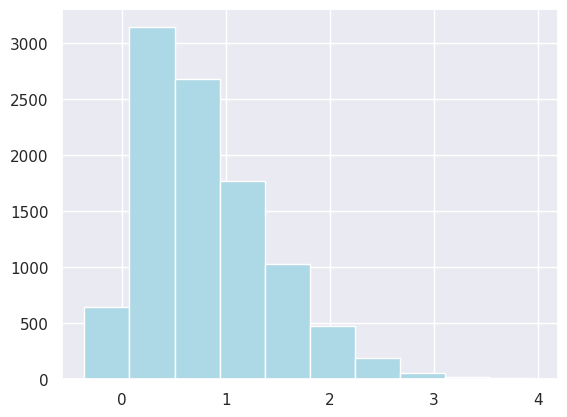

In [39]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightblue')

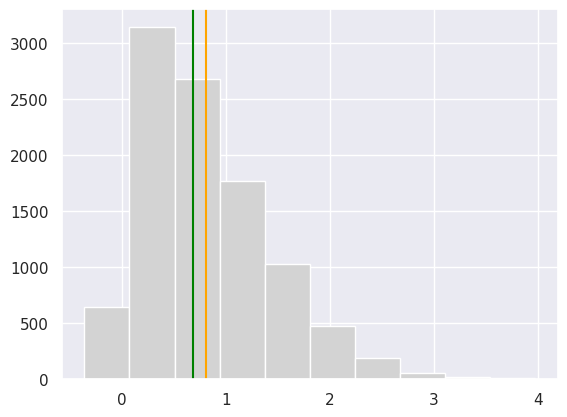

In [40]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

In [41]:
xbar = x.mean() # xbar wata meanakay tyaya 
xbar  

0.8028673213056436

array([[<Axes: title={'center': 'isk'}>, <Axes: title={'center': 'teh'}>],
       [<Axes: title={'center': 'thr'}>, <Axes: title={'center': 'us'}>],
       [<Axes: title={'center': 'us_thr'}>, <Axes: >]], dtype=object)

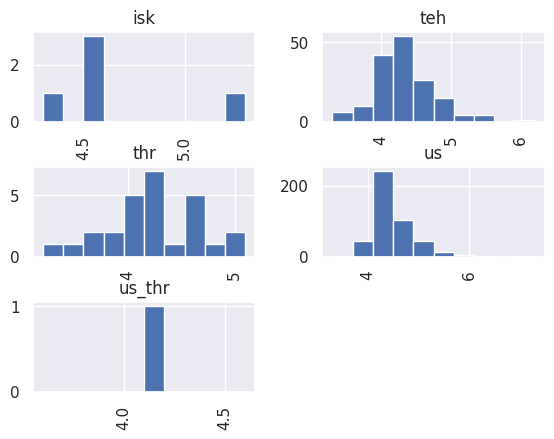

In [42]:
mydata.hist(by='locationSource',column = 'mag')

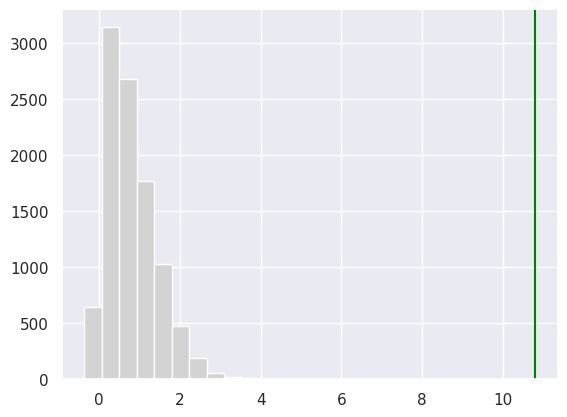

In [43]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean()+10, color='green')
_ = plt.hist(x, color = 'lightgrey')

In [44]:
np.median(x)

0.682134074483534

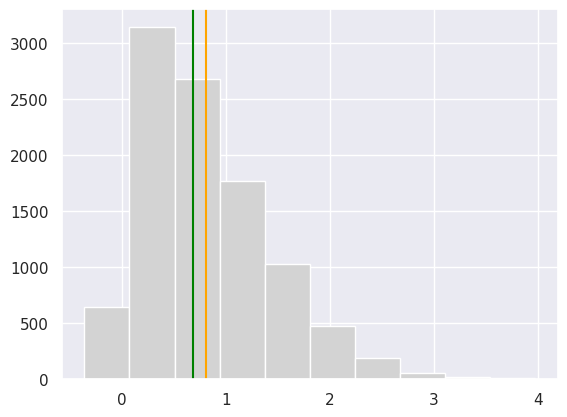

In [45]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

In [46]:
x.var()# variance

0.37419399093053596

In [47]:
x.var()**(1/2) # ** wata nrxy ragy 0.5 , ragy varyance dakata standard deviation  

0.6117139780408292

In [48]:
sigma = x.std() # standard deviatioin  std 
sigma

0.6117139780408292

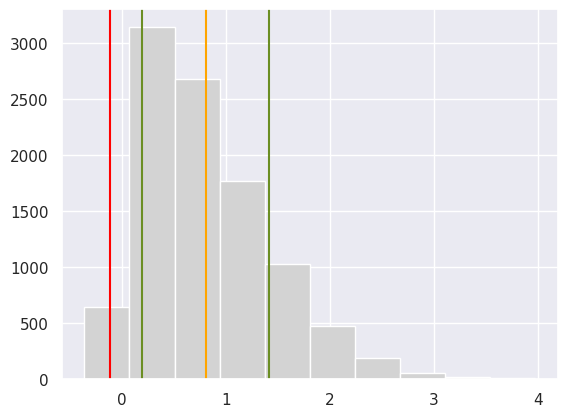

In [49]:
fig, ax = plt.subplots() 
plt.axvline(x = xbar , color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
plt.axvline(x = xbar-sigma*1.5, color='red')
_ = plt.hist(x, color = 'lightgray')

In [50]:
sigma/(x.size)**(1/2)  # standard error

0.0061171397804082915